#### Question 1 : Explain the assumptions required to use ANOVA and provide examples of violations that could impact the validity of the results.

#### Analysis of Variance (ANOVA) is a statistical method used to compare means between three or more groups. The method makes several assumptions about the data, which are important to consider when interpreting the results.

#### Assumptions of ANOVA:
1. Independence: The observations within each group must be independent of each other. This means that the value of one observation should not influence the value of another observation within the same group.

2. Normality: The distribution of the data within each group should be approximately normal. This means that the data should be symmetrically distributed around the mean and the majority of the data should be located near the mean.

3. Homogeneity of variance: The variance within each group should be approximately equal. This means that the spread of the data should be similar across all groups.

#### Violations of these assumptions can impact the validity of ANOVA results and should be carefully considered when interpreting the results. Examples of violations include:
1. Independence: If there is a relationship between observations within a group, the assumption of independence is violated. For example, if the same individual is measured multiple times in a study, the observations within that individual are not independent.

2. Normality: If the data is not normally distributed within each group, the ANOVA results may not be valid. For example, if the data is highly skewed, the normality assumption may be violated.

3. Homogeneity of variance: If the variance is not approximately equal within each group, the ANOVA results may not be valid. For example, if the variance in one group is much larger than the variance in another group, the homogeneity of variance assumption may be violated.

#### In summary, it is important to carefully consider the assumptions of ANOVA and to check for any violations before interpreting the results. If violations are found, alternative methods may need to be used to analyze the data.

#### Question 2 : What are the three types of ANOVA, and in what situations would each be used?

#### Three types of ANOVA are :
1. One-Way ANOVA: One-way ANOVA is a type of ANOVA that is used to compare the means of three or more groups that are classified by a single factor or independent variable. For example, a researcher might be interested in determining whether there are significant differences in the effectiveness of three different types of pain medication. The factor is the type of pain medication, and the dependent variable is the level of pain relief. One-way ANOVA is used to test whether there is a significant difference in the mean level of pain relief between the three types of pain medication.

2. Repeated Measures ANOVA: Repeated measures ANOVA is a type of ANOVA that is used to compare the means of three or more groups when the same individuals are measured repeatedly over time or under different conditions. For example, a researcher might be interested in determining whether there are significant differences in the reaction time of participants when they are presented with different types of stimuli. The factor is the type of stimulus, and the dependent variable is the reaction time. Repeated measures ANOVA is used to test whether there is a significant difference in the mean reaction time between the different types of stimuli.

3. Factorial ANOVA: Factorial ANOVA is a type of ANOVA that is used to compare the means of three or more groups when there are two or more independent variables or factors. For example, a researcher might be interested in determining whether there are significant differences in the effectiveness of a weight loss program that is targeted towards men and women. The factors are gender and weight loss program, and the dependent variable is the amount of weight lost. Factorial ANOVA is used to test whether there is a significant interaction between the gender and weight loss program factors, as well as the main effects of each factor on weight loss.

#### Question 3 : What is the partitioning of variance in ANOVA, and why is it important to understand this concept?

The partitioning of variance in ANOVA refers to the division of the total variation in a dataset into different sources of variation, which are then used to calculate the F-statistic and test for significant differences between groups. In ANOVA, the total variance is partitioned into two components: the variance between groups and the variance within groups.

The variance between groups represents the differences between the group means, and is calculated by taking the sum of squares between groups (SSB). The variance within groups represents the variability within each group, and is calculated by taking the sum of squares within groups (SSW). The total variance is calculated by taking the sum of squares total (SST), which is the sum of the squared differences between each data point and the overall mean.

By understanding the partitioning of variance in ANOVA, we can determine the proportion of the total variance that can be attributed to the differences between groups (SSB), and the proportion that is due to random error within each group (SSW). This allows us to test whether the differences between groups are statistically significant, and to determine the magnitude of these differences relative to the overall variability in the dataset. It also allows us to identify the sources of variation that are most important in explaining the differences between groups, and to assess the validity of our conclusions based on the assumptions underlying the ANOVA model.

In summary, understanding the partitioning of variance in ANOVA is important for interpreting the results of the analysis, identifying sources of variation that contribute to group differences, and evaluating the assumptions underlying the ANOVA model.
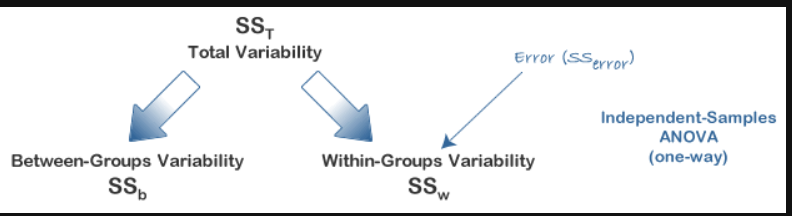

#### Question 4 : How would you calculate the total sum of squares (SST), explained sum of squares (SSE), and residual sum of squares (SSR) in a one-way ANOVA using Python?

In [10]:
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.stats.anova import anova_lm

# Loading Iris dataset from seaborn
df_iris = sns.load_dataset('iris')
print('Top 5 rows of IRIS dataset : ')
print(df_iris.head())
print('\n===================================================================\n')

# Fit the one-way ANOVA model (sepal length vs Species)
model = ols('sepal_length ~ species', data=df_iris).fit()

# Calculate the sum of squares for the model
print('Values for Sepal Length vs Species:')
SSE = model.ess
SSR = model.ssr
SST = SSE + SSR

print('SSE:', round(SSE,4))
print('SSR:', round(SSR,4))
print('SST:', round(SST,4))

print('\n===================================================================\n')
# Print the ANOVA table
print(anova_lm(model))

Top 5 rows of IRIS dataset : 
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Values for Sepal Length vs Species:
SSE: 63.2121
SSR: 38.9562
SST: 102.1683


             df     sum_sq    mean_sq           F        PR(>F)
species     2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual  147.0  38.956200   0.265008         NaN           NaN


#### Question 5 : In a two-way ANOVA, how would you calculate the main effects and interaction effects using Python?

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the inbuilt dataset from statsmodels
data = sm.datasets.get_rdataset("ToothGrowth", "datasets").data

# printing top 5 rows of Tooth Growth dataset
print('Top 5 rows of Tooth Growth Dataset')
print(data.head())
print('\n==============================================================\n')

# Define the model formula
model_formula = "len ~ C(supp) + C(dose) + C(supp):C(dose)"

# Fit the model using OLS regression
model = ols(model_formula, data).fit()

# Calculate the main effects and interaction effects
main_effects = sm.stats.anova_lm(model, typ=2)['sum_sq'][:2]
interaction_effect = sm.stats.anova_lm(model, typ=2)['sum_sq'][2:3]

# Print the results
print("Main effects:")
print(main_effects)
print("\n==============================\n")
print("Interaction effect:")
print(interaction_effect)
print("\n==============================\n")
print("ANOVA Table:")
print(anova_lm(model,typ=2))


Top 5 rows of Tooth Growth Dataset
    len supp  dose
0   4.2   VC   0.5
1  11.5   VC   0.5
2   7.3   VC   0.5
3   5.8   VC   0.5
4   6.4   VC   0.5


Main effects:
C(supp)     205.350000
C(dose)    2426.434333
Name: sum_sq, dtype: float64


Interaction effect:
C(supp):C(dose)    108.319
Name: sum_sq, dtype: float64


ANOVA Table:
                      sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN


#### Question 6 : Suppose you conducted a one-way ANOVA and obtained an F-statistic of 5.23 and a p-value of 0.02. What can you conclude about the differences between the groups, and how would you interpret these results?

Significance value is not given in above problem I am assuming significance value of alpha = 0.05

If the alpha value is 0.05 and the p-value is 0.02, then we can REJECT the null hypothesis at the 0.05 level of significance. This means that there is sufficient evidence to conclude that there is a statistically significant difference between the groups.

In this case, we would reject the null hypothesis, indicating that there is a significant difference between the groups. However, we still need to investigate the direction of this difference and which specific groups are different from each other.

The F-statistic of 5.23 suggests that there is a difference between the groups, and the magnitude of the F-value indicates that the variability between groups is 5.23 times the variability within groups. However, post-hoc tests or further analyses are necessary to determine which groups are significantly different from each other.

Post Hoc methods like Tukey's Honestly Significant Difference (HSD), Bonferroni correction, Scheffe's method can be used for further analysis of means


#### Question 7 : In a repeated measures ANOVA, how would you handle missing data, and what are the potentialconsequences of using different methods to handle missing data?

In repeated measures ANOVA, missing data can occur when one or more measurements are not available for a particular subject at a specific time point. There are several methods to handle missing data in repeated measures ANOVA, each with its own potential consequences:
Complete Case Analysis (CCA): This method involves excluding any participant with missing data from the analysis. CCA is easy to implement and can lead to unbiased estimates if data are missing at random. However, it can result in a loss of statistical power, and the assumption of missing completely at random (MCAR) may be violated.

Last Observation Carried Forward (LOCF): This method involves using the last observed value of a variable as a substitute for any missing values for that variable at later time points. LOCF can produce biased estimates if the assumption that missing values are missing completely at random (MCAR) is not met.

Multiple Imputation (MI): This method involves imputing missing values with plausible values, and then analyzing each of the completed datasets separately. MI can lead to unbiased estimates if data are missing at random (MAR) or missing not at random (MNAR), but it can be computationally intensive and requires making assumptions about the distribution of the missing data.

Maximum Likelihood (ML): This method involves estimating model parameters using all available data and allowing for missing values. ML can lead to unbiased estimates if data are missing at random (MAR), but it requires making assumptions about the distribution of the missing data.

The choice of method for handling missing data in repeated measures ANOVA should depend on the reason for the missing data and the assumptions that can be made about the missingness mechanism. The potential consequences of using different methods to handle missing data can include biased estimates, loss of statistical power, and reduced generalizability of the findings.

#### Question 8 : What are some common post-hoc tests used after ANOVA, and when would you use each one? Provide an example of a situation where a post-hoc test might be necessary.

Post-hoc tests are used in ANOVA to compare specific pairs of groups after a significant main effect or interaction effect has been found. Some common post-hoc tests include:
1. Tukey's Honestly Significant Difference (HSD) test: This test compares all possible pairs of group means and controls for the family-wise error rate. It is often used when the number of groups is equal or large, and when there is no prior knowledge about which groups differ.

2. Bonferroni correction: This test controls the family-wise error rate by dividing the alpha level by the number of comparisons. It is often used when there are few groups or when there is prior knowledge about which groups differ.

3. Scheffe's test: This test also controls the family-wise error rate but is more conservative than Tukey's HSD test. It is often used when the number of groups is large, and when there is no prior knowledge about which groups differ.

4. Dunnett's test: This test compares each group mean to a control group mean and controls for the family-wise error rate. It is often used when there is a control group and when the research question is focused on comparing other groups to the control group.

The choice of post-hoc test depends on the research question, the number of groups, and the prior knowledge about which groups are likely to differ. A post-hoc test might be necessary when an ANOVA indicates a significant difference between groups but does not identify which specific groups differ. For example, a researcher might conduct an ANOVA to examine the effect of different instructional methods on student achievement. If the ANOVA shows a significant main effect of instructional method, the researcher might use a post-hoc test to compare the mean scores of each instructional method to identify which methods are significantly different from each other.

#### Question 9 : A researcher wants to compare the mean weight loss of three diets: A, B, and C. They collect data from 50 participants who were randomly assigned to one of the diets. Conduct a one-way ANOVA using Python to determine if there are any significant differences between the mean weight loss of the three diets. Report the F-statistic and p-value, and interpret the results.

In [12]:
import numpy as np
from scipy.stats import f_oneway

# Generate simulated data assuming normal distribution with same variance
np.random.seed(1)
diet_A = np.random.normal(5, 1, 50)
diet_B = np.random.normal(4, 1, 50)
diet_C = np.random.normal(3, 1, 50)

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(diet_A, diet_B, diet_C)

# Set significance level
alpha = 0.05

# Null hypothesis: The mean weight loss is the same for all three diets.
# Alternative hypothesis: The mean weight loss is different for at least one diet.
null_hypothesis = "The mean weight loss is the same for all three diets."
alternate_hypothesis = "The mean weight loss is different for at least one diet."

print("F-statistic:", f_statistic)
print("p-value:", p_value)
if p_value < alpha:
    print("We reject the null hypothesis.")
    print(f"Conclusion : {alternate_hypothesis}")
else:
    print("We fail to reject the null hypothesis.")
    print(f"Conclusion : {null_hypothesis}")

F-statistic: 57.06379442059458
p-value: 4.5619061215783055e-19
We reject the null hypothesis.
Conclusion : The mean weight loss is different for at least one diet.


Performing Tukey's test for mean difference


In [13]:
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#create DataFrame to hold data
df = pd.DataFrame({'weight_loss': list(diet_A) + list(diet_B) + list(diet_C),
                   'group': np.repeat(['A', 'B', 'C'], repeats=50)})

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['weight_loss'],
                          groups=df['group'],
                          alpha=0.05)

# Print results
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B  -0.8278   0.0 -1.2477 -0.4079   True
     A      C  -1.8898   0.0 -2.3097 -1.4699   True
     B      C   -1.062   0.0 -1.4819 -0.6421   True
---------------------------------------------------


Above interpretation means all three means are different reject value is True for all of 3
1. Mean Difference between diet_A and diet_B is -0.8278
2. Mean Difference between diet_A and diet_C is -1.8898
3. Mean Difference between diet_A and diet_C is -1.062

Maximum mean difference is in between diet_A and diet_C
All mean differences with diet_A are negative
diet_A has shown highest weight loss compared to diet_B and diet_C

#### Question 10 : A company wants to know if there are any significant differences in the average time it takes to complete a task using three different software programs: Program A, Program B, and Program C. They randomly assign 30 employees to one of the programs and record the time it takes each employee to complete the task. Conduct a two-way ANOVA using Python to determine if there are any main effects or interaction effects between the software programs and employee experience level (novice vs. experienced). Report the F-statistics and p-values, and interpret the results.

In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Setting random seed for reproducibility
np.random.seed(123)

# Generating 2 random time samples for novice and expert
time_novice = np.random.normal(loc=15, scale=2, size=30)
time_expert = np.random.normal(loc=10, scale=2, size=30)

# Generate simulated data
data = pd.DataFrame({
    'Software': ['A']*20 + ['B']*20 + ['C']*20,
    'Experience': ['Novice']*30 + ['Experienced']*30,
    'Time': list(time_novice)+list(time_expert)
})

# Print the simulated data head 
print('Simulated Data example :')
print(data.head())

print('\n======================================================================================\n')

# Fit the two-way ANOVA model
model = ols('Time ~ C(Software) + C(Experience) + C(Software):C(Experience)', data=data).fit()
table = sm.stats.anova_lm(model, typ=1)

# Set significance level
alpha = 0.05

# Main effects and interaction effect
print(table)
print('\n')
if table['PR(>F)'][0] < alpha:
    print("Conclusion: There is a significant main effect of software.")
else:
    print("Conclusion: There is no significant main effect of software.")

if table['PR(>F)'][1] < alpha:
    print("Conclusion: There is a significant main effect of experience.")
else:
    print("Conclusion: There is no significant main effect of experience.")

if table['PR(>F)'][2] < alpha:
    print("Conclusion: There is a significant interaction effect between software and experience.")
else:
    print("Conclusion: There is no significant interaction effect between software and experience.")

Simulated Data example :
  Software Experience       Time
0        A     Novice  12.828739
1        A     Novice  16.994691
2        A     Novice  15.565957
3        A     Novice  11.987411
4        A     Novice  13.842799


                             df      sum_sq     mean_sq          F  \
C(Software)                 2.0  204.881181  102.440590  18.135666   
C(Experience)               1.0  165.079097  165.079097  29.224933   
C(Software):C(Experience)   2.0   17.481552    8.740776   1.547431   
Residual                   56.0  316.319953    5.648571        NaN   

                                 PR(>F)  
C(Software)                8.460472e-07  
C(Experience)              1.375177e-06  
C(Software):C(Experience)  2.217544e-01  
Residual                            NaN  


Conclusion: There is a significant main effect of software.
Conclusion: There is a significant main effect of experience.
Conclusion: There is no significant interaction effect between software and experience.


##### Here are the interpretations of the three conclusions:
"There is a significant main effect of software": This means that the software programs used by the employees have a significant impact on the outcome variable (e.g., completion time), independent of the experience level of the employees. This suggests that the choice of software program is an important factor that should be considered carefully when completing this task.

"There is a significant main effect of experience": This means that the experience level of the employees has a significant impact on the outcome variable, independent of the software program used. Specifically, this suggests that experienced employees may complete the task faster than novices, or vice versa. This finding can be helpful for the company to identify the best employees for a given task and to provide appropriate training for new employees.

"There is NO significant interaction effect between software and experience": This means that the effect of software on the outcome variable does not depend on the experience level of the employees, and vice versa. This suggests that the software programs perform similarly for both novices and experienced employees. This finding can be helpful for the company to decide which software program to use, as they do not need to consider the experience level of the employees when making the choice.

#### Question 11 : An educational researcher is interested in whether a new teaching method improves student test scores. They randomly assign 100 students to either the control group (traditional teaching method) or the experimental group (new teaching method) and administer a test at the end of the semester. Conduct a two-sample t-test using Python to determine if there are any significant differences in test scores between the two groups. If the results are significant, follow up with a post-hoc test to determine which group(s) differ significantly from each other.

#### 1. Two sample t-test , alpha=0.05

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Setting numpy random seed
np.random.seed(45)

# Generating normal test scores with same variance for both control groups
test_score_control = np.random.normal(loc=70, scale=3, size=50)
test_score_experimental = np.random.normal(loc=85, scale=3, size=50)

# Creating the dataframe
df = pd.DataFrame({'test_score':list(test_score_control)+list(test_score_experimental),
                   'group':['control']*50 + ['experimental']*50})

# printing the sample dataframe
print('Simulated data for test_scores:')
print(df.head())
print('\n===============================\n')

null_hypothesis = "There is NO difference in test scores between the control and experimental groups."
alt_hypothesis = "There is SIGNIFICANT difference in test scores between the control and experimental groups."

# Conduct the two-sample t-test
control_scores = df[df['group'] == 'control']['test_score']
experimental_scores = df[df['group'] == 'experimental']['test_score']
t_stat, p_val = ttest_ind(control_scores, experimental_scores, equal_var=True)
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val}")
print('\n')

# Significance value 
alpha = 0.05
if p_val<alpha:
    print('Reject the Null Hypothesis')
    print(f'Conclusion : {alt_hypothesis}')
else:
    print('Failed to reject the Null Hypothesis')
    print(f'Conclusion : {null_hypothesis}')

Simulated data for test_scores:
   test_score    group
0   70.079124  control
1   70.780965  control
2   68.814563  control
3   69.387097  control
4   66.185102  control


t-statistic: -28.5074, p-value: 3.096206271894725e-49


Reject the Null Hypothesis
Conclusion : There is SIGNIFICANT difference in test scores between the control and experimental groups.


#### 2. Tukey's HSD test

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Conduct post-hoc Tukey's test
tukey_results = pairwise_tukeyhsd(df['test_score'], df['group'], 0.05)
print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2    meandiff p-adj  lower   upper  reject
----------------------------------------------------------
control experimental  15.8829   0.0 14.7773 16.9886   True
----------------------------------------------------------


Tukey's Results Interpretation

Reject = True suggests that there is significant difference in both control and Experimental groups also p-adj is almost 0.

Experimental group has increased the performance of test scores of students by mean of 15.88 approximately

Mean score improved by Experimental method is (14.78,16.99) with 95% confidence level

#### Question 12 : A researcher wants to know if there are any significant differences in the average daily sales of three retail stores: Store A, Store B, and Store C. They randomly select 30 days and record the sales for each store on those days. Conduct a repeated measures ANOVA using Python to determine if there are any significant differences in sales between the three stores. If the results are significant, follow up with a posthoc test to determine which store(s) differ significantly from each other.

In [18]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# set random seed for reproducibility
np.random.seed(456)

# generate sales data for Store A, B, and C
sales_a = np.random.normal(loc=1000, scale=100, size=(30,))
sales_b = np.random.normal(loc=1050, scale=150, size=(30,))
sales_c = np.random.normal(loc=800, scale=80, size=(30,))

# create a DataFrame to store the sales data
sales_df = pd.DataFrame({'Store A': sales_a, 'Store B': sales_b, 'Store C': sales_c})

# reshape the DataFrame for repeated measures ANOVA
sales_melted = pd.melt(sales_df.reset_index(), id_vars=['index'], value_vars=['Store A', 'Store B', 'Store C'])
sales_melted.columns = ['Day', 'Store', 'Sales']

# Printing top 5 rows of generated data
print('Generated data top 5 rows : ')
print(sales_melted.head())

print('\n================================================\n')

# perform repeated measures ANOVA
rm_anova = AnovaRM(sales_melted, 'Sales', 'Day', within=['Store'])
rm_results = rm_anova.fit()
print(rm_results)

# check if null hypothesis should be rejected based on p-value
if rm_results.anova_table['Pr > F'][0] < 0.05:
    # perform post-hoc Tukey test
    print('Reject the Null Hypothesis : Atleast one of the group has different mean.\n')
    print('Tukey HSD posthoc test:')
    tukey_results = pairwise_tukeyhsd(sales_melted['Sales'], sales_melted['Store'])
    print(tukey_results)
else:
    print('NO significant difference between groups.')

Generated data top 5 rows : 
   Day    Store        Sales
0    0  Store A   933.187150
1    1  Store A   950.179048
2    2  Store A  1061.857582
3    3  Store A  1056.869225
4    4  Store A  1135.050948


               Anova
      F Value Num DF  Den DF Pr > F
-----------------------------------
Store 51.5040 2.0000 58.0000 0.0000

Reject the Null Hypothesis : Atleast one of the group has different mean.

Tukey HSD posthoc test:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj    lower     upper   reject
-----------------------------------------------------------
Store A Store B   21.2439 0.6945   -40.881   83.3688  False
Store A Store C -207.8078    0.0 -269.9328 -145.6829   True
Store B Store C -229.0517    0.0 -291.1766 -166.9268   True
-----------------------------------------------------------


##### Interpretation of above

In Repeated Measure ANOVA test we got p_value (Pr>F) as 0.0000 which is less than 0.05 .Reject the Null Hypothesis .Which means atleast one of the mean of groups is different.

In Tukey's Post Hoc Test we get following interpretation :

No significant difference between sales of Store A and Store B. Store B earns 21.24 dollars more than store A(becuse reject=False for this)
Significant difference between sales of Store A and Store C . Store C has approx 207.8 dollars lesser compared to store A (reject=True)
Siginficant difference between sales of Store B and Store C . Store C has approx 229.0 dollars lesser compared to store B (reject=True)